<a href="https://colab.research.google.com/github/Shubham829KIIT/Meso4-Model-Implementation/blob/main/Group_3_Minor_Project_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group 3 :

Made by:
Shubham Pal (2105829)
Email - 2105829@kiit.ac.in

Soham Patra (2105831)
Email - 2105831@kiit.ac.in

Under the guidance of Dr. Rajdeep Chatterjee ,Associate Proffessor ,
KIIT DU
Email - rajdeepfcs@kiit.ac.in

### We use Meso4 model(a pre-trained model) containing the adjusted weights for various hidden layers in the ANN.
https://arxiv.org/pdf/1809.00888.pdf - The research paper used for this model.

We have 2 sets of Data
1.DeepFake
2.Real

It's a classification problem with CNN .
The images have been padded to reduce the loss of border - line features and Feature Maps and Pooling has been applied accordingly.

2000 DeepFake and 2000 Real datset images are used in this case.

Steps ---->

<a href="https://colab.research.google.com/drive/1VQHDKuE_b2Wes9Lz8EXQMsDGQc2SkMbi#scrollTo=pYAmkWaVVuod&line=1&uniqifier=1">Mount Google Drive</a>

<a href="https://colab.research.google.com/drive/1VQHDKuE_b2Wes9Lz8EXQMsDGQc2SkMbi#scrollTo=Jm063-FPbTcx&line=4&uniqifier=1">Bring DeepFake dataset from Google Drive to Colab Local Directory</a>

<a href="https://colab.research.google.com/drive/1VQHDKuE_b2Wes9Lz8EXQMsDGQc2SkMbi#scrollTo=dQa0zkMFxgtu&line=4&uniqifier=1">Bring Real dataset from Google Drive to Colab Local Directory</a>

<a href="https://colab.research.google.com/drive/1VQHDKuE_b2Wes9Lz8EXQMsDGQc2SkMbi#scrollTo=P8EeCRetasQn&line=1&uniqifier=1">Convert Real dataset images and convert them into a numpy array of size (256,256,3)</a>

<a href="https://colab.research.google.com/drive/1VQHDKuE_b2Wes9Lz8EXQMsDGQc2SkMbi#scrollTo=R999mrVMD8vl&line=19&uniqifier=1">Convert DeepFake dataset images and convert them into a numpy array of size (256,256,3)</a>

<a href="https://colab.research.google.com/drive/1VQHDKuE_b2Wes9Lz8EXQMsDGQc2SkMbi#scrollTo=g6kAx0lHJ-OI&line=1&uniqifier=1">Attach Deepfake images with label 0 and Real images with label 1</a>

<a href="https://colab.research.google.com/drive/1VQHDKuE_b2Wes9Lz8EXQMsDGQc2SkMbi#scrollTo=CkO4DnhqKqR5&line=1&uniqifier=1">Train test split of data</a>


<a href="https://colab.research.google.com/drive/1VQHDKuE_b2Wes9Lz8EXQMsDGQc2SkMbi#scrollTo=EaraohN4LMWU&line=8&uniqifier=1">The Meso4 architecture constructed using Tensorflow.</a>


<a href="https://colab.research.google.com/drive/1VQHDKuE_b2Wes9Lz8EXQMsDGQc2SkMbi#scrollTo=Gv1DmE29W1IK&line=1&uniqifier=1">Model fitted with training images</a>

<a href="https://colab.research.google.com/drive/1VQHDKuE_b2Wes9Lz8EXQMsDGQc2SkMbi#scrollTo=vz2K3QZS3DLU&line=14&uniqifier=1">Results of the test images</a>


<a href="https://colab.research.google.com/drive/1VQHDKuE_b2Wes9Lz8EXQMsDGQc2SkMbi#scrollTo=PI1V1ynUd8Tu&line=8&uniqifier=1">F1-score, ROC score for MesoNet</a>

<a href="https://colab.research.google.com/drive/1VQHDKuE_b2Wes9Lz8EXQMsDGQc2SkMbi#scrollTo=srtcw_YlzoNb&line=12&uniqifier=1">The Confusion Matrix after testing</a>

<a href="https://colab.research.google.com/drive/1VQHDKuE_b2Wes9Lz8EXQMsDGQc2SkMbi#scrollTo=RFJuUaOsz0vj&line=41&uniqifier=1">A New Folder containing 3 deepfake images and 2 real images are given to check whether our models performance in real-life.</a>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

# Source folder path in Google Drive
source_folder = '/content/drive/My Drive/DeepFake'

# Destination folder path in Colab (change as needed)
destination_folder = '/content/DeepFake'

# Copy the folder from Google Drive to Colab
shutil.copytree(source_folder, destination_folder)

## Brings the DeepFake dataset from Google Drive to Colab Local Directory.

'/content/DeepFake'

In [ ]:
import shutil

# Source folder path in Google Drive
source_folder = '/content/drive/My Drive/Real'

# Destination folder path in Colab (change as needed)
destination_folder = '/content/Real'

# Copy the folder from Google Drive to Colab
shutil.copytree(source_folder, destination_folder)

'/content/Real'

In [ ]:
import os
import cv2
import numpy as np

def load_images(folder_path):
    # Create an empty list to store image matrices
    image_matrices = []

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    # Loop through each file in the folder
    for file in files:
        # Check if the file is a JPG image
        if file.lower().endswith(".jpg"):
            # Load the image using OpenCV
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path)

            # Resize the image to 256x256 pixels
            resized_image = cv2.resize(image, (256, 256))

            # Convert the resized image to RGB format
            rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

            # Append the image matrix to the list
            image_matrices.append(rgb_image)

    return image_matrices

# Specify the folder containing the images
folder_path = "/content/Real"

# Load images from the folder and convert them into matrices
image_matrices = load_images(folder_path)

# Convert the list of image matrices to a NumPy array
real_image_array = np.array(image_matrices)
real_image_array=real_image_array[0:2000,]

# Print the shape of the image array (number of images, height, width, channels)
print("Image array shape:", real_image_array.shape)


Image array shape: (2000, 256, 256, 3)


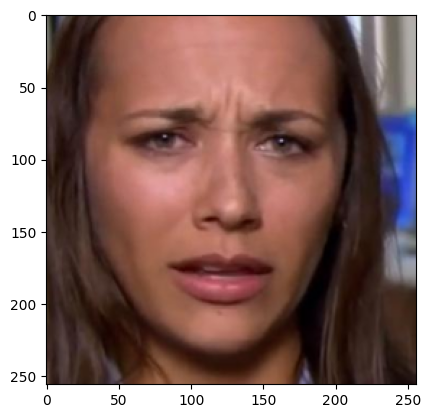

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(real_image_array[1])

In [ ]:
def load_images(folder_path):
    # Create an empty list to store image matrices
    image_matrices = []

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    # Loop through each file in the folder
    for file in files:
        # Check if the file is a JPG image
        if file.lower().endswith(".jpg"):
            # Load the image using OpenCV
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path)

            # Resize the image to 256x256 pixels
            resized_image = cv2.resize(image, (256, 256))

            # Convert the resized image to RGB format
            rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

            # Append the image matrix to the list
            image_matrices.append(rgb_image)

    return image_matrices

# Specify the folder containing the images
folder_path = "/content/DeepFake"

# Load images from the folder and convert them into matrices
image_matrices = load_images(folder_path)

# Convert the list of image matrices to a NumPy array
deepfake_image_array = np.array(image_matrices)
deepfake_image_array=deepfake_image_array[0:2000,]
# Print the shape of the image array (number of images, height, width, channels)
print("Image array shape:", deepfake_image_array.shape)

Image array shape: (2000, 256, 256, 3)


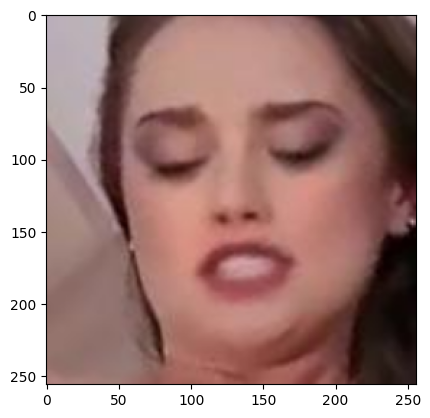

In [ ]:
plt.imshow(deepfake_image_array[100])

In [ ]:
print("The dimensions of the real image are =",real_image_array.shape)
print("The dimensions of the deepfake image are =",deepfake_image_array.shape)

The dimensions of the real image are = (2000, 256, 256, 3)
The dimensions of the deepfake image are = (2000, 256, 256, 3)


In [ ]:
real_data=real_image_array
deepfake_data=deepfake_image_array

In [ ]:
real_labels = np.ones(len(real_data)) ### Real will be marked as 1
deepfake_labels = np.zeros(len(deepfake_data)) ### DeepFake will be marked as 0


In [ ]:
X = np.concatenate((deepfake_data, real_data), axis=0)
y = np.concatenate((deepfake_labels, real_labels), axis=0)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(8, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((4, 4), padding='same'),
    Flatten(),
])

# Print the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       224       
                                                                 
 batch_normalization (Batch  (None, 256, 256, 8)       32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       1608      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 8)       32        
 chNormalization)                                                
                                                        

In [ ]:
from tensorflow.keras.layers import Dropout
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.load_weights('/content/Meso4_DF (1)')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       224       
                                                                 
 batch_normalization (Batch  (None, 256, 256, 8)       32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       1608      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 8)       32        
 chNormalization)                                                
                                                        

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
100/100 [==============================] - 13s 37ms/step - loss: 0.1482 - accuracy: 0.9362
Epoch 2/10
100/100 [==============================] - 3s 34ms/step - loss: 0.0994 - accuracy: 0.9653
Epoch 3/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0779 - accuracy: 0.9759
Epoch 4/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0623 - accuracy: 0.9791
Epoch 5/10
100/100 [==============================] - 3s 35ms/step - loss: 0.0688 - accuracy: 0.9753
Epoch 6/10
100/100 [==============================] - 4s 35ms/step - loss: 0.0561 - accuracy: 0.9825
Epoch 7/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0490 - accuracy: 0.9844
Epoch 8/10
100/100 [==============================] - 3s 33ms/step - loss: 0.0329 - accuracy: 0.9922
Epoch 9/10
100/100 [==============================] - 3s 34ms/step - loss: 0.0504 - accuracy: 0.9837
Epoch 10/10
100/100 [==============================] - 4s 37ms/step - loss: 0.0295 - accur

In [ ]:
y_pred=model.predict(x_test)



25/25 [==============================] - 1s 20ms/step


In [ ]:
from sklearn.metrics import roc_auc_score, f1_score
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Assuming y_pred and y_test are numpy arrays or lists containing predicted and true labels respectively

# Calculate AUC ROC
auc_roc = roc_auc_score(y_test, y_pred)

# Calculate F1-score
# If y_pred contains probabilities, you need to convert them to binary predictions first
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
f1 = f1_score(y_test, y_pred_binary)

print(f'AUC ROC: {auc_roc}')
print(f'F1-score: {f1}')


[[1. 1.]
 [0. 0.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]
AUC ROC: 0.9854482866531058
F1-score: 0.9846153846153847


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.985
Confusion Matrix:
[[404  11]
 [  1 384]]


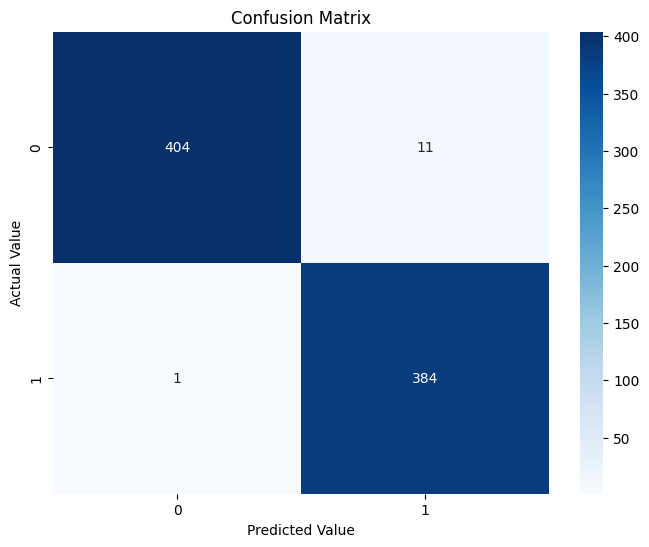

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Setting labels and title
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')

# Show plot
plt.show()


In [ ]:
import os
import cv2
import numpy as np

def load_images(folder_path):
    # Create an empty list to store image matrices
    image_matrices = []

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    # Loop through each file in the folder
    for file in files:
        # Check if the file is a JPG image
        if file.lower().endswith(".jpg"):
            # Load the image using OpenCV
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path)

            # Resize the image to 256x256 pixels
            resized_image = cv2.resize(image, (256, 256))

            # Convert the resized image to RGB format
            rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

            # Append the image matrix to the list
            image_matrices.append(rgb_image)

    return image_matrices

# Specify the folder containing the images
folder_path = "/content/New Folder"

# Load images from the folder and convert them into matrices
image_matrices = load_images(folder_path)

# Convert the list of image matrices to a NumPy array
pred_image_array = np.array(image_matrices)
pred_image_array=pred_image_array
# Print the shape of the image array (number of images, height, width, channels)
print("Image array shape:", pred_image_array.shape)

Image array shape: (5, 256, 256, 3)


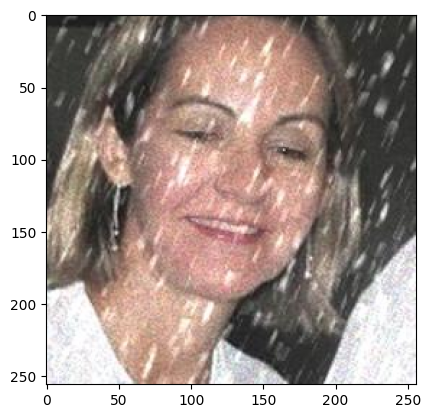

In [ ]:
plt.imshow(pred_image_array[0])

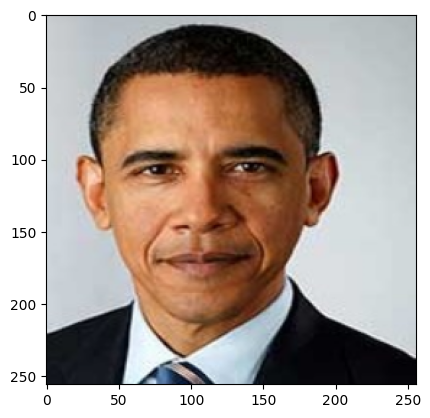

In [ ]:
plt.imshow(pred_image_array[1])

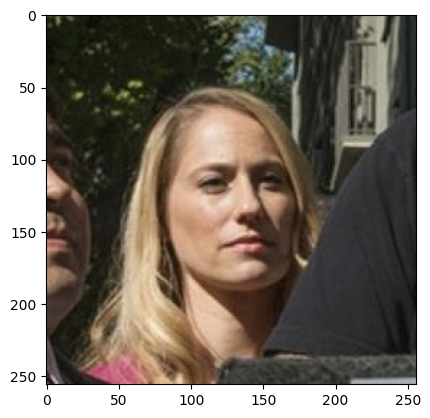

In [ ]:
plt.imshow(pred_image_array[2])

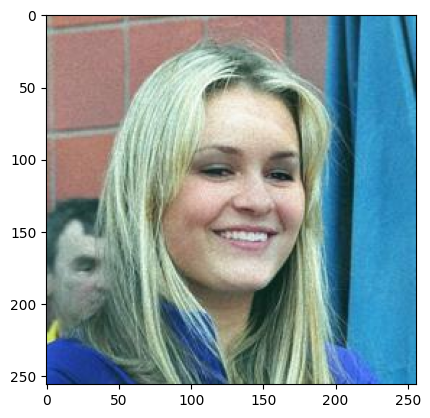

In [ ]:
plt.imshow(pred_image_array[3])

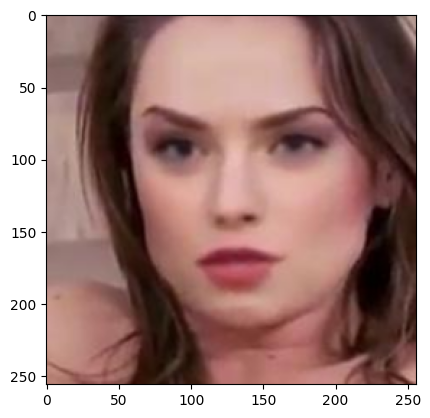

In [ ]:
plt.imshow(pred_image_array[4])

In [ ]:

pred_image_array=pred_image_array /255.0
pred_image_array.shape

(5, 256, 256, 3)

In [ ]:
y_predicted=model.predict(pred_image_array)

1/1 [==============================] - 1s 520ms/step


In [ ]:
print (y_predicted.shape)

(5, 1)


In [ ]:
y_predicted
for i in y_predicted :
  if (i>0.5) :
    print ("Classified as real by the classifier")
  else :
    print ("Classified as DeepFake by the classifier")

Classified as DeepFake by the classifier
Classified as real by the classifier
Classified as DeepFake by the classifier
Classified as real by the classifier
Classified as DeepFake by the classifier


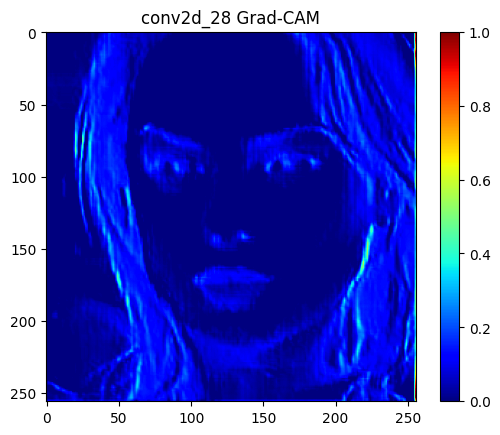

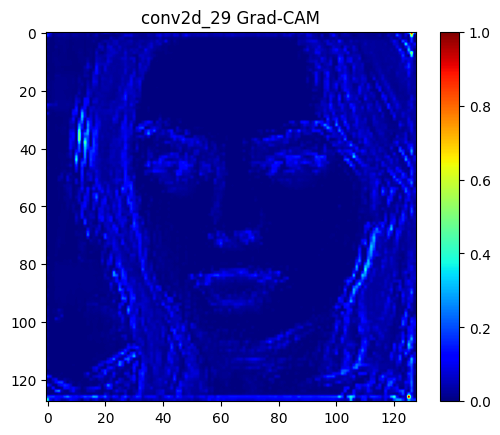

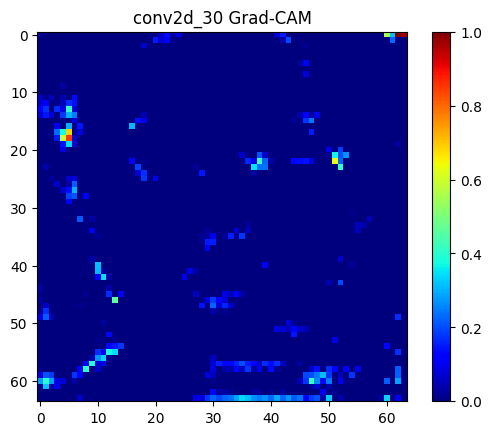

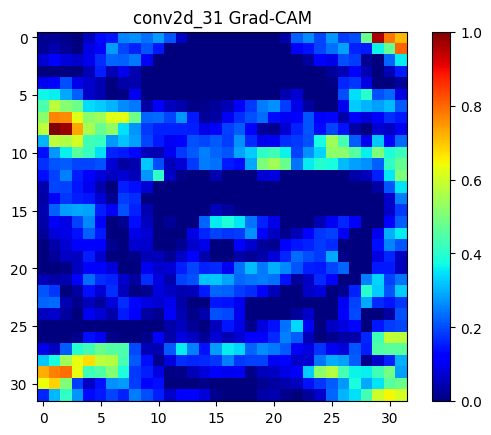

In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten,Dropout,Dense
from tensorflow.keras.models import Sequential

# Define your model
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(8, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((4, 4), padding='same'),
    Flatten(),
])

model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# Load the pre-trained weights
model.load_weights('/content/Meso4_DF (1)')

def grad_cam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, tf.argmax(predictions[0])]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

# Load and preprocess your image
img_path = '/content/deepfake1.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256))
img_array = tf.keras.preprocessing.image.img_to_array(img)

img_array = tf.expand_dims(img_array, axis=0)
img_array /= 255.0

# Generate Grad-CAM heatmaps for specific layers
layer_names = [layer.name for layer in model.layers if isinstance(layer, Conv2D)]
for layer_name in layer_names:
    heatmap = grad_cam(model, img_array, layer_name)
    plt.imshow(heatmap[0], cmap='jet')
    plt.title(layer_name + ' Grad-CAM')
    plt.colorbar()
    plt.show()


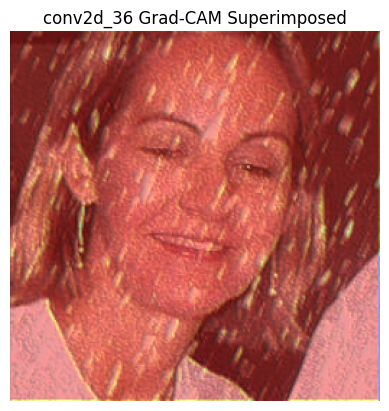

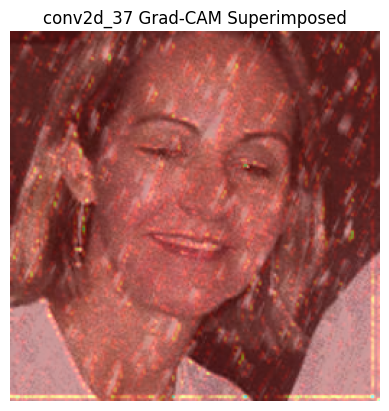

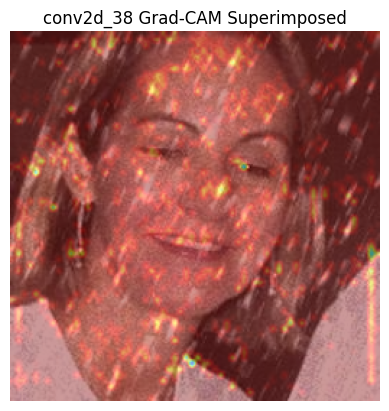

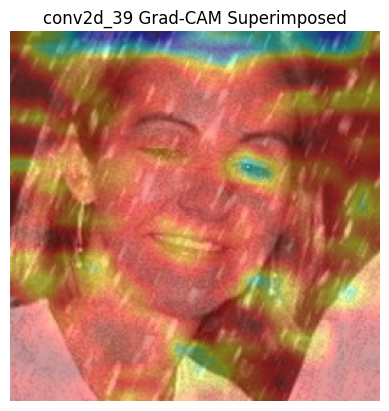

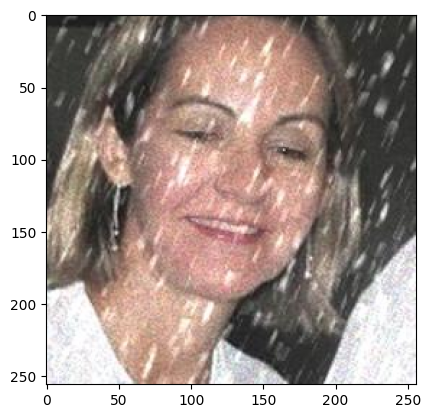

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential

# Define your model
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(8, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((4, 4), padding='same'),
    Flatten(),
])

model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# Load the pre-trained weights
model.load_weights('/content/Meso4_DF (1)')

def grad_cam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, tf.argmax(predictions[0])]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

# Load and preprocess your image
img_path = '/content/deepfake 3.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256))  # Resize the image to match the model input size
img_array = np.expand_dims(img, axis=0)
img_array = img_array / 255.0  # Normalize the image

# Generate Grad-CAM heatmaps for specific layers
layer_names = [layer.name for layer in model.layers if isinstance(layer, Conv2D)]
for layer_name in layer_names:
    heatmap = grad_cam(model, img_array, layer_name)

    # Resize the heatmap to match the size of the original image
    heatmap = cv2.resize(heatmap[0], (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)

    # Apply the heatmap as an overlay on the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    # Display the superimposed image
    plt.imshow(superimposed_img)
    plt.title(layer_name + ' Grad-CAM Superimposed')
    plt.axis('off')
    plt.show()
plt.imshow(img)

Epoch 1/10
3200/3200 [==============================] - 250s 77ms/step - loss: 0.2663 - accuracy: 0.8963
Epoch 2/10
3200/3200 [==============================] - 249s 78ms/step - loss: 0.1582 - accuracy: 0.9463
Epoch 3/10
3200/3200 [==============================] - 253s 79ms/step - loss: 0.1203 - accuracy: 0.9647
Epoch 4/10
3200/3200 [==============================] - 243s 76ms/step - loss: 0.1100 - accuracy: 0.9641
Epoch 5/10
3200/3200 [==============================] - 249s 78ms/step - loss: 0.1144 - accuracy: 0.9622
Epoch 6/10
3200/3200 [==============================] - 243s 76ms/step - loss: 0.0777 - accuracy: 0.9737
Epoch 7/10
3200/3200 [==============================] - 246s 77ms/step - loss: 0.0655 - accuracy: 0.9828
Epoch 8/10
3200/3200 [==============================] - 243s 76ms/step - loss: 0.0641 - accuracy: 0.9759
Epoch 9/10
3200/3200 [==============================] - 235s 73ms/step - loss: 0.0660 - accuracy: 0.9784
Epoch 10/10
3200/3200 [==============================] 

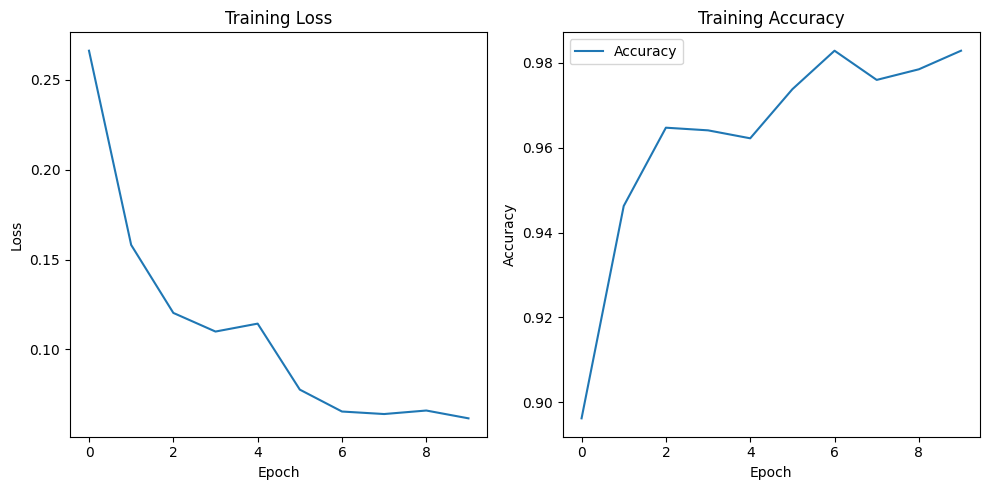

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback

# Define your model
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(8, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((4, 4), padding='same'),
    Flatten(),
])

model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Define a callback to track loss and accuracy during training
class LossAccuracyCallback(Callback):
    def __init__(self):
        super(LossAccuracyCallback, self).__init__()
        self.losses = []
        self.accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs['loss'])
        self.accuracies.append(logs['accuracy'])

# Load the pre-trained weights
model.load_weights('/content/Meso4_DF (1)')

# Define the callback instance
loss_accuracy_callback = LossAccuracyCallback()

# Compile your model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train your model and track loss and accuracy using the callback
history = model.fit(x_train,y_train, epochs=10, batch_size=1, callbacks=[loss_accuracy_callback])

# Plot the loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.legend()
plt.tight_layout()
plt.show()
